Questo Nootebook ha lo scopo di mostrare un tipo possibile di visualizzazione per un Multigrafo, quella multilayer. Il concetto chiave sta nel scomporre il grafo in più layer che rappresenteranno un diverso tipo di informazione. 

Questo tipo di plot serve appunto a visualizzare un grafo diviso in parti e a far risaltare le relazioni tra queste.

Utilizzeremo il dataset delle interazioni tra i personaggi del Trono di spade che è stato costruito usando una tecnica di scraping sui 5 libri.

link dataset: https://github.com/mathbeveridge/asoiaf.git

# Gestione Dei Dati


In [1]:
! git clone https://github.com/mathbeveridge/asoiaf.git

fatal: destination path 'asoiaf' already exists and is not an empty directory.


Un limite del tipo di visualizzazione che stiamo per fare è la dimensione del grafo, un grafo troppo grande non viene reso adeguatamente e rende il plot  inutile e non informativo. Per ottenere un plot che abbia un senso dobbiamo decidere cosa vogliamo visualizzare dei nostri dati. 

Nel nostro caso abbiamo un dataset composto da diversi file:
*  5 file che contengono i personaggi che appaiono in ogni libro (nodi del grafo)
*  5 file che contengono le interazioni che hanno avuto questi personaggi all'interno di un libro (edge del grafo)

Quello che vorrei visualizzare nel mio plot finale sono le interazioni che hanno avuto i personaggi all'interno di ogni libro e le interazioni che hanno avuto i personaggi principali tra i vari libri.

Con personaggio principale intendiamo un personaggio che è presente in ogni libro(nucleo del grafo).

Quindi importando i file e filtrando i dati dei i personaggi che appaiono in ogni libro posso ricavare una lista di personaggi principali

In [2]:
import csv


#Importa personaggi del libro 1
with open('asoiaf/data/asoiaf-book1-nodes.csv', 'r') as nodesFileL1:
  nodesReaderL1 = csv.reader(nodesFileL1, delimiter=',', quotechar='"')
  nodesL1 = list(nodesReaderL1)[1:]
#Importa personaggi del libro 2
with open('asoiaf/data/asoiaf-book2-nodes.csv', 'r') as nodesFileL2:
  nodesReaderL2 = csv.reader(nodesFileL2, delimiter=',', quotechar='"')
  nodesL2 = list(nodesReaderL2)[1:]
#Importa personaggi del libro 3
with open('asoiaf/data/asoiaf-book3-nodes.csv', 'r') as nodesFileL3:
  nodesReaderL3 = csv.reader(nodesFileL3, delimiter=',', quotechar='"')
  nodesL3 = list(nodesReaderL3)[1:]
#Importa personaggi del libro 4
with open('asoiaf/data/asoiaf-book4-nodes.csv', 'r') as nodesFileL4:
  nodesReaderL4 = csv.reader(nodesFileL4, delimiter=',', quotechar='"')
  nodesL4 = list(nodesReaderL4)[1:]
#Importa personaggi del libro 5
with open('asoiaf/data/asoiaf-book5-nodes.csv', 'r') as nodesFileL5:
  nodesReaderL5 = csv.reader(nodesFileL5, delimiter=',', quotechar='"')
  nodesL5 = list(nodesReaderL5)[1:]

# per trovare i personaggi che si trovano in ogni libro trasformo le liste in set() in modo da poter fare un'operazione di intersezione
# infatti personaggiPrincipali = PersonaggiL1 ∩ PersonaggiL2 ∩ PersonaggiL3 ∩ PersonaggiL4 ∩ PersonaggiL5
setNodesL1 = set([x[0] for x in nodesL1])
setNodesL2 = set([x[0] for x in nodesL2])
setNodesL3 = set([x[0] for x in nodesL3])
setNodesL4 = set([x[0] for x in nodesL4])
setNodesL5 = set([x[0] for x in nodesL5])

#Eseguo operazione di intersezione
setNodesLIntersecate = setNodesL1.intersection(setNodesL2)
setNodesLIntersecate = setNodesLIntersecate.intersection(setNodesL3)
setNodesLIntersecate = setNodesLIntersecate.intersection(setNodesL4)
setNodesLIntersecate = setNodesLIntersecate.intersection(setNodesL5)

#riconverto in lista
personaggiPrincipali = list(setNodesLIntersecate)

A questo punto importiamo gli edge del grafo

La struttura di un edge è:  [Source, Target, Type, Weight, Book]


In [3]:
#Importa edge libro 1
with open('asoiaf/data/asoiaf-book1-edges.csv', 'r') as edgesFileL1:
  edgesReaderL1 = csv.reader(edgesFileL1, delimiter=',', quotechar='"')
  edgesL1 = list(edgesReaderL1)[1:]
#Importa edge libro 2
with open('asoiaf/data/asoiaf-book2-edges.csv', 'r') as edgesFileL2:
  edgesReaderL2 = csv.reader(edgesFileL2, delimiter=',', quotechar='"')
  edgesL2 = list(edgesReaderL2)[1:]
#Importa edge libro 3
with open('asoiaf/data/asoiaf-book3-edges.csv', 'r') as edgesFileL3:
  edgesReaderL3 = csv.reader(edgesFileL3, delimiter=',', quotechar='"')
  edgesL3 = list(edgesReaderL3)[1:]
#Importa edge libro 4
with open('asoiaf/data/asoiaf-book4-edges.csv', 'r') as edgesFileL4:
  edgesReaderL4 = csv.reader(edgesFileL4, delimiter=',', quotechar='"')
  edgesL4 = list(edgesReaderL4)[1:]
#Importa edge libro 5
with open('asoiaf/data/asoiaf-book5-edges.csv', 'r') as edgesFileL5:
  edgesReaderL5 = csv.reader(edgesFileL5, delimiter=',', quotechar='"')
  edgesL5 = list(edgesReaderL5)[1:]

#concatena le liste
edgesL = edgesL1 + edgesL2 + edgesL3 + edgesL4 + edgesL5

# Visualizzazione

Per la visualizzazione ho deciso di usare la libreria python Py3Plex.


Per ulteriori info su Py3plex lascio il link di github: https://github.com/SkBlaz/Py3Plex

In [4]:
!pip3 install py3plex

Py3plex offre una buona visualizzazione multilayer di un multigrafo.

Il nostro dataset è diviso per libri, quindi quello che vogliamo è visualizzare le interazioni che i personaggi hanno avuto all'interno di un determinato libro distintamente. 

Vogliamo che ogni layer della nostra visualizzazione faccia riferimento ad un libro.

Dopo aver creato un grafo vuoto aggiungo ogni arco, che di conseguenza aggiungerà pure i nodi a cui si riferisce.

Visto che sto inserendo le relazioni all'interno di ogni libro il mio source_type e target_type saranno gli stessi, in particolare saranno il numero del libro.


In [5]:
from py3plex.core import multinet
from py3plex.visualization.multilayer import plt

M = multinet.multi_layer_network(network_type="multiplex")

for e in edgesL :
  try :
    edge = {"source":e[0],
            "target":e[1],
            "source_type":int(e[4]),
            "type":"mention",
            "weight" : int(e[3]),
            "target_type":int(e[4])
            }
    M.add_edges(edge)
  except ValueError :
    pass


  0%|          | 0/100 [00:00<?, ?it/s]

-------------------- 
 Computing core stats of the network 
 --------------------
Name: 
Type: MultiDiGraph
Number of nodes: 1340
Number of edges: 3908
Average in degree:   2.9164
Average out degree:   2.9164
Number of unique node IDs: 988
-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:28<00:00,  3.57it/s]


BarnesHut Approximation  took  2.80  seconds
Repulsion forces  took  23.86  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.53  seconds
AdjustSpeedAndApplyForces step  took  0.24  seconds
Finished with layout..
Name: 
Type: MultiDiGraph
Number of nodes: 187
Number of edges: 684
Average in degree:   3.6578
Average out degree:   3.6578
Name: 
Type: MultiDiGraph
Number of nodes: 259
Number of edges: 774
Average in degree:   2.9884
Average out degree:   2.9884
Name: 
Type: MultiDiGraph
Number of nodes: 303
Number of edges: 1008
Average in degree:   3.3267
Average out degree:   3.3267


0it [00:00, ?it/s]

Name: 
Type: MultiDiGraph
Number of nodes: 274
Number of edges: 682
Average in degree:   2.4891
Average out degree:   2.4891
Name: 
Type: MultiDiGraph
Number of nodes: 317
Number of edges: 760
Average in degree:   2.3975
Average out degree:   2.3975


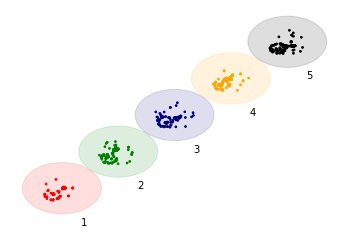

In [6]:
M.basic_stats()
M.visualize_network(style="diagonal")
plt.show()

Dopo aver visualizzato i grafi delle interazioni tra i personaggi principali divise per libro potrebbe essere interessante collegare questi layer con degli edge

Py3plex permette di falro grazie alla struttura degli edge.
Gli edge sono infatti strutturati così: 

{"source", "target", "source_type", "target_type", "type", "weight"}

Quello che voglio fare è collegare i personaggi che rimangono per tutti i libri partendo dal primo e arrivando all'ultimo con un arco che abbia come weight la somma del degree del personaggio nel libro di partenza e nel libro di arrivo.

Quindi aggiungo un edge che collega lo stesso personaggio principale, ma in due libri successivi.

In questo caso source e target avranno lo stesso valore invece target_type = source_type + 1 per indicare il libro successivo.


In [7]:
for e in personaggiPrincipali:
  for i in range(1, 5):
    try:
      edge = {"source":e,
          "target":e,
          "source_type":i,
          "type":"mention",
          "weight" : M.get_degrees()[(e, i)] + M.get_degrees()[(e, i+1)],
          "target_type":i+1
          }
      M.add_edges(edge)
    except KeyError:
      pass

  1%|          | 1/100 [00:00<00:10,  9.33it/s]

-------------------- 
 Computing core stats of the network 
 --------------------
Name: 
Type: MultiDiGraph
Number of nodes: 1340
Number of edges: 4068
Average in degree:   3.0358
Average out degree:   3.0358
Number of unique node IDs: 999
-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:28<00:00,  3.45it/s]


BarnesHut Approximation  took  1.71  seconds
Repulsion forces  took  26.30  seconds
Gravitational forces  took  0.08  seconds
Attraction forces  took  0.57  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds
Finished with layout..
Name: 
Type: MultiDiGraph
Number of nodes: 187
Number of edges: 684
Average in degree:   3.6578
Average out degree:   3.6578
Name: 
Type: MultiDiGraph
Number of nodes: 259
Number of edges: 774
Average in degree:   2.9884
Average out degree:   2.9884
Name: 
Type: MultiDiGraph
Number of nodes: 303
Number of edges: 1008
Average in degree:   3.3267
Average out degree:   3.3267
Name: 
Type: MultiDiGraph
Number of nodes: 274
Number of edges: 682
Average in degree:   2.4891
Average out degree:   2.4891
Name: 
Type: MultiDiGraph
Number of nodes: 317
Number of edges: 760
Average in degree:   2.3975
Average out degree:   2.3975


100%|██████████| 1/1 [00:00<00:00,  8.79it/s]


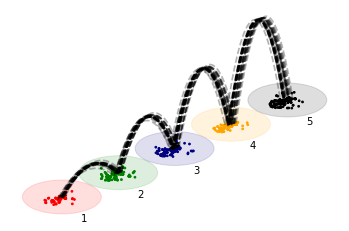

In [8]:
M.basic_stats()
M.visualize_network(style="diagonal")
plt.show()

Con la visualizzazione sopra possiamo notare che tutti i libri sono collegati tramite questi personaggi principali, se volessi togliere i nodi del grafo che corrispondono ai personaggi principali cosa osserverei?

  2%|▏         | 2/100 [00:00<00:08, 11.63it/s]

-------------------- 
 Computing core stats of the network 
 --------------------
Name: 
Type: MultiDiGraph
Number of nodes: 1140
Number of edges: 1518
Average in degree:   1.3316
Average out degree:   1.3316
Number of unique node IDs: 621
-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:17<00:00,  5.85it/s]


BarnesHut Approximation  took  1.40  seconds
Repulsion forces  took  15.11  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  0.24  seconds
AdjustSpeedAndApplyForces step  took  0.20  seconds
Finished with layout..
Name: 
Type: MultiDiGraph
Number of nodes: 147
Number of edges: 167
Average in degree:   1.1361
Average out degree:   1.1361
Name: 
Type: MultiDiGraph
Number of nodes: 219
Number of edges: 244
Average in degree:   1.1142
Average out degree:   1.1142
Name: 
Type: MultiDiGraph
Number of nodes: 263
Number of edges: 382
Average in degree:   1.4525
Average out degree:   1.4525
Name: 
Type: MultiDiGraph
Number of nodes: 234
Number of edges: 303
Average in degree:   1.2949
Average out degree:   1.2949
Name: 
Type: MultiDiGraph
Number of nodes: 277
Number of edges: 422
Average in degree:   1.5235
Average out degree:   1.5235


0it [00:00, ?it/s]


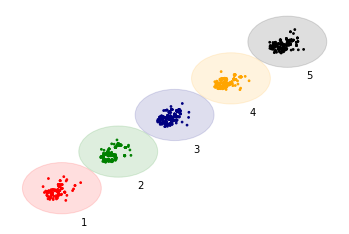

In [9]:
listaNodi = list(M.get_nodes())
listaNodiPrincipali = []
for e in listaNodi:
  if e[0] in personaggiPrincipali:
    listaNodiPrincipali.append([e[0], e[1]])
M.remove_nodes(listaNodiPrincipali, input_type="list")

M.basic_stats()
M.visualize_network(style="diagonal")
plt.show()

Posso osservare che togliendo tutti i nodi che corrispondono ai personaggi principali in ogni libro vengono eliminati anche gli archi che permettevano il collegamento tra libri. Possiamo quindi dire che togliendo i personaggi principali i 5 libri appaiono come storie diverse in quanto non mantengono nessun personaggio per tutta la loro durata.

# Visualizzazione di un diverso tipo di informazione

Con la visualizzazione precedente abbiamo visualizzato come i personaggi principali collegani i vari libri e li rendono un'unica storia, ma non è l'unica informazione che possiamo visualizzare con questi dati.

Cambiando la definizione di Personaggio Principale possiamo cambiare il senso della nostra visualizzazione portandoci ad evidenziare un diverso tipo di informazione.

In questo esempio:
* Personaggi Principali = nodi con maggior degree in ogni libro

In questo caso i personaggi principali saranno corrispettivi di un libro e non più dell'intera saga.

Precisamente personaggi principali sono i nodi che hanno un degree maggiore di 0,95 quantile.

Come in precedenza viene creato un grafo e viene riempito con tutti gli edge relativi alle relazioni che hanni i personaggi all'interno dei libri.

In [10]:
Mdeg = multinet.multi_layer_network(network_type="multiplex")

for e in edgesL :
  try :
    if (int(e[4]) in range(1, 6)) :
      edge = {"source":e[0],
              "target":e[1],
              "source_type":int(e[4]),
              "type":"mention",
              "weight" : int(e[3]), ## add arbitrary attributes!
              "target_type":int(e[4])
            }
      Mdeg.add_edges(edge)
  except ValueError :
    pass

Successivamente vengono calcolati i personaggi principali di ogni libro e vengono inseriti gli edge che collegano i personaggi principali tra un libro e il successivo, se è presente anche in quello.



-------------------- 
 Computing core stats of the network 
 --------------------
Name: 
Type: MultiDiGraph
Number of nodes: 1367
Number of edges: 3938
Average in degree:   2.8808
Average out degree:   2.8808


  0%|          | 0/100 [00:00<?, ?it/s]

Number of unique node IDs: 1008
-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


BarnesHut Approximation  took  1.69  seconds
Repulsion forces  took  24.74  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.54  seconds
AdjustSpeedAndApplyForces step  took  0.24  seconds
Finished with layout..
Name: 
Type: MultiDiGraph
Number of nodes: 193
Number of edges: 684
Average in degree:   3.5440
Average out degree:   3.5440
Name: 
Type: MultiDiGraph
Number of nodes: 266
Number of edges: 774
Average in degree:   2.9098
Average out degree:   2.9098
Name: 
Type: MultiDiGraph
Number of nodes: 309
Number of edges: 1008
Average in degree:   3.2621
Average out degree:   3.2621
Name: 
Type: MultiDiGraph
Number of nodes: 279
Number of edges: 682
Average in degree:   2.4444
Average out degree:   2.4444


  0%|          | 0/1 [00:00<?, ?it/s]

Name: 
Type: MultiDiGraph
Number of nodes: 320
Number of edges: 760
Average in degree:   2.3750
Average out degree:   2.3750


100%|██████████| 1/1 [00:00<00:00, 38.68it/s]


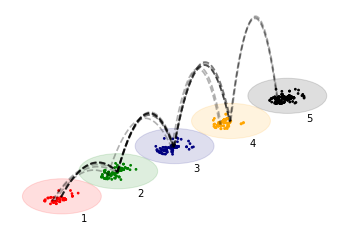

In [11]:
import numpy as np

def degPersonaggio(listaDegree, e) :
  for i in listaDegree :
    if i[0] == e :
      return i[1]
    
listaDegree = Mdeg.get_degrees()
listaDegreePerLibro = [[],[],[],[],[]]
personaggiPrincipaliPerLibro = [[],[],[],[],[]]
quantili = [0, 0, 0, 0, 0]

#listaDegreePerLibro[][] = tutti i personaggi con il loro degree in ogni libro
for e in listaDegree :
  try:
    listaDegreePerLibro[e[1]-1].append([e[0], listaDegree[e]])
  except IndexError :
    pass

#quantili[] = quantile(0.95) del Degree di ogni libro
for i in range(0, 5) :
  npL = np.array(listaDegreePerLibro[i])
  listDegree = npL[:, 1]
  listDegree = [int(e) for e in listDegree]
  quantili[i] = (np.quantile(listDegree, 0.95))

#filtra i personaggi principali
for i in range(0, 5):
  for e in listaDegreePerLibro[i]:
    if e[1]>=quantili[i] :
      personaggiPrincipaliPerLibro[i].append(e[0])

#inserisce edge tra i personaggi principali che collegani i libri
for i in range(0, 4) :
  for e in personaggiPrincipaliPerLibro[i] :
    if e in personaggiPrincipaliPerLibro[i+1] :
      try :
        edge = {"source":e[0],
                "target":e[0],
                "source_type": int(i+1),
                "type":"mention",
                "weight" : degPersonaggio(listaDegreePerLibro[i], e) + degPersonaggio(listaDegreePerLibro[i+1], e),
                "target_type": int(i+2)
                }
        
        Mdeg.add_edges(edge)
      except ValueError :
        pass

Mdeg.basic_stats()
Mdeg.visualize_network(style="diagonal")
plt.show()

Con questa visualizzazione possiamo notare come i primi 3 libri siano più connessi in quanto mantengono più personaggi principali in comune, invece negli ultimi 2 possiamo renderci conto che pochi dei personaggi principali rimangono per entrambi i libri.

Questa analisi trova una conferma nella realtà in quanto i libri 4 e 5 parlano di vicende lontane, quindi con pochi personaggi principali in comune.